<a href="https://colab.research.google.com/github/luciainnocenti/IncrementalLearning/blob/Lucia/TestAndTrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import GitHub repository

In [0]:
import os
import logging
import sys


In [2]:
if not os.path.isdir('./DatasetCIFAR'):
  !git clone -b Lucia https://github.com/luciainnocenti/IncrementalLearning.git
  !mv 'IncrementalLearning' 'DatasetCIFAR'

Cloning into 'IncrementalLearning'...
remote: Enumerating objects: 181, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (173/173), done.
remote: Total 318 (delta 113), reused 18 (delta 8), pack-reused 137
Receiving objects: 100% (318/318), 229.22 KiB | 3.70 MiB/s, done.
Resolving deltas: 100% (189/189), done.


# Import packages

In [0]:
from DatasetCIFAR.data_set import Dataset 
from DatasetCIFAR import ResNet
from DatasetCIFAR import utils
from DatasetCIFAR import params
from torchvision import models
import torch.nn as nn
import torch
import torch.optim as optim
import torchvision
from torchvision import transforms
from torch.utils.data import Subset, DataLoader
from torch.nn import functional as F

# Define Network

In [0]:
resNet = ResNet.resnet32(num_classes=100)
resNet = resNet.to(params.DEVICE)

In [0]:
resnet_transformer = transforms.Compose([transforms.Resize(32), 
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Normalizes tensor with mean and standard deviation
])


# Define DataSets

In [6]:
trainDS = Dataset(train=True, transform = resnet_transformer)
testDS = Dataset(train=False, transform = resnet_transformer)

Extracting data/cifar-100-python.tar.gz to data
Files already downloaded and verified


# Useful plots

The function plotEpoch plots, at the end of each task, how accuracy and loss change during the training phase. It show

*   Validation and Training Accuracy
*   Validation and Training Loss

The function plotTask, for each task, how the accuracy on the validation set change when adding new tasks


In [0]:
def plotTask(pars_tasks):
  import numpy as np
  import matplotlib.pyplot as plt

  x_tasks =  np.linspace(10, 100, 10)

  plt.plot(x_tasks, pars_tasks, label=['Accuracy', 'Loss'])
  plt.xlabel("Epoch")
  plt.title('Accuracy over tasks')
  plt.legend(['Accuracy', 'Loss'])
  plt.grid(True)
  plt.show()



# Train and evaluation phase

In [8]:
pars_tasks = []
test_indexes = []

for task in range(0, 100, params.TASK_SIZE):
  pars_tasks.insert(task, 0)

for task in range(0, 100, params.TASK_SIZE):

  train_indexes = trainDS.__getIndexesGroups__(task)
  test_indexes = test_indexes + testDS.__getIndexesGroups__(task)

  train_dataset = Subset(trainDS, train_indexes)
  test_dataset = Subset(testDS, test_indexes)

  train_loader = DataLoader( train_dataset, num_workers=params.NUM_WORKERS, batch_size=params.BATCH_SIZE)
  test_loader = DataLoader( test_dataset, num_workers=params.NUM_WORKERS, batch_size=params.BATCH_SIZE )

  if(task == 0):
    torch.save(resNet, 'resNet_task{0}.pt'.format(task))
  
  utils.trainfunction(task, train_loader)
  param = utils.evaluationTest(task, test_loader) #evaluate test set at step task
  pars_tasks[int(task/10)] = param #pars_task[i] = (accuracy, loss) at i-th task	

#plotTask(pars_tasks)


task = 0 


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


At step  0  and at epoch =  0  the loss is =  0.3767191469669342  and accuracy is =  0.2096
At step  0  and at epoch =  1  the loss is =  0.32787877321243286  and accuracy is =  0.3024
At step  0  and at epoch =  2  the loss is =  0.2467537671327591  and accuracy is =  0.3896
At step  0  and at epoch =  3  the loss is =  0.1633584201335907  and accuracy is =  0.4548
At step  0  and at epoch =  4  the loss is =  0.12617488205432892  and accuracy is =  0.4932
At step  0  and at epoch =  5  the loss is =  0.0878923162817955  and accuracy is =  0.5466
At step  0  and at epoch =  6  the loss is =  0.0683269277215004  and accuracy is =  0.5782
At step  0  and at epoch =  7  the loss is =  0.05473507568240166  and accuracy is =  0.6262
At step  0  and at epoch =  8  the loss is =  0.059016693383455276  and accuracy is =  0.662
At step  0  and at epoch =  9  the loss is =  0.03789397329092026  and accuracy is =  0.687
At step  0  and at epoch =  10  the loss is =  0.04552793502807617  and accu

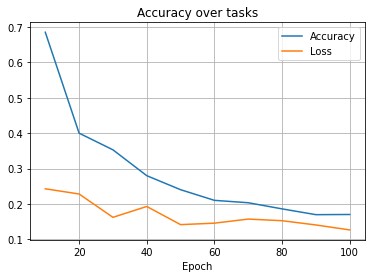

In [16]:
plotTask(pars_tasks)